# <span style="color:#BC48CD"> Numerical Simulation Laboratory (NSL) - Esercitazione 1</span>
#### <span style="color:#9C19ED">Author: </span>    Alessia Sambruna <span style="color:#9C19ED">Student number: </span>     942397



# Esercizio 1: Test the Pseudo-Random Number generator

## Esercizio 1.1

#### Testare che $\langle r \rangle = \int_0^1 r dr = 1/2$. Produrre un grafico della stima di $\langle r \rangle$ e della sua incertezza come funzione del numero di blocchi $N$, avendo svolto un grande numero di lanci $M$.

## Soluzione Esercizio 1.1

Per eseguire l'esercizio svolgiamo una media a blocchi.
- Si generano $M = 10000$ numeri casuali tra 0 e 1 e sono salvati su un vector
- Si divide il vector in $N$ blocchi, ciascuno composto da $L =M/N$ elementi. Per ogni blocco si calcola la media degli elementi del blocco e si salva il valore su un vector.  
- Si valuta la media progressiva: l'nesimo elmento del vector della media progressiva è dato da $\frac{\sum_{i}^n r_i}{n}$
- Si salvano i risultati su un file "Esercise_1.1/Exercise_1.1_values.dat". Sono state salvate le stime per $\langle r \rangle - 1/2$, istantantee e progressive in funzione del numero di estrazioni, e con le rispettive incertezze. 

Si rappresentano i risultati della media progressiva in funzione del numero di blocchi 

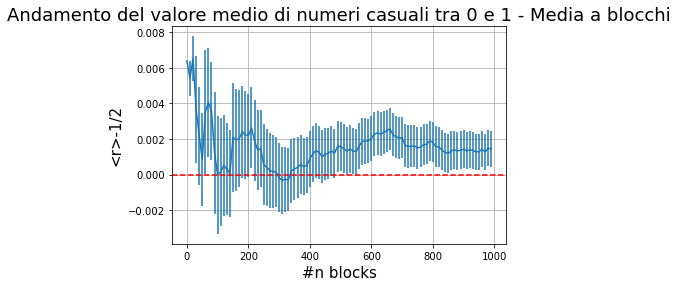

In [1]:
#Punto 1: Taking data from file 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("Esercise_1.1/Exercise_1.1_values.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
x = x/100
plt.title("Andamento del valore medio di numeri casuali tra 0 e 1 - Media a blocchi", fontsize = 18)
plt.errorbar(x,f,yerr=error)
plt.axhline(0.0, color = 'red', linestyle = 'dashed')
plt.xlabel('#n blocks', fontsize = 15)
plt.ylabel('<r>-1/2', fontsize = 15)
plt.grid(True)

plt.show()

Osserviamo che il valore $\langle r \rangle - 1/2$ tende a 0 come atteso 

In [2]:
f[-1]

0.00143761

## Esercizio 1.2

#### Testare che $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Produrre un grafico della stima di $\sigma^2$ e la sua incertezza della media, ottenuto estraendo un numero elevato di numeri casuali tra 0 e 1 $M$ come funzione del numero di blocchi $N$. 

Utilizziamo lo stesso metodo utilizzato nel punto precedente: impostiamo una media a blocchi utilizzando un numero $M = 10000$ di lanci e $N = 100$ blocchi, ciascuno composto da $L =M/N$ elementi. 
In questo caso si utilizzano i valori random determinati precedentemente per calcolare la sommatoria di $(r[k] - 0.5)^2$, quindi per ciascuno dei valori trovati si imposta la media a blocchi come fatto precedentemente. 


Si salvano i risultati su un file "Esercise_1.1/Exercise_1.2_values.dat". Sono state salvate le stime per $\langle \sigma^2 \rangle - 1/12$, istantantee e progressive in funzione del numero di estrazioni, e con le rispettive incertezze. 

## Soluzione Esercizio 1.2

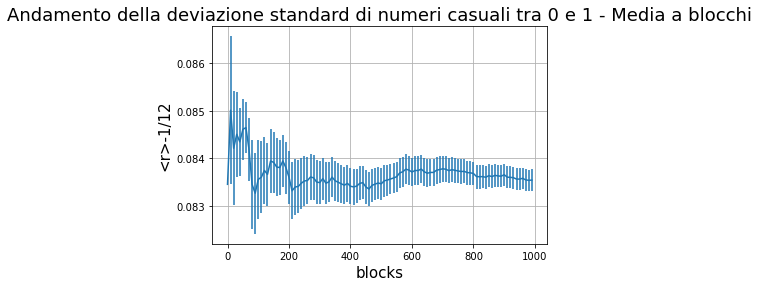

In [3]:
#Part 2 : stima della deviazione standard
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


x, f, error = np.loadtxt("Esercise_1.1/Exercise_1.2_values.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
x = x/100
plt.title("Andamento della deviazione standard di numeri casuali tra 0 e 1 - Media a blocchi", fontsize = 18)
plt.errorbar(x,f,yerr=error)
#plt.axhline(0.0, color = 'red', linestyle = 'dashed')
plt.xlabel('blocks', fontsize = 15)
plt.ylabel('<r>-1/12', fontsize= 15)
plt.grid(True)

plt.show()

In [4]:
f[-1]

0.0835406

Osserviamo che la sitma tende a 0 come atteso. Notiamo che a differenza della stima precedente per poter arrivare ad una migliore stima sarebbero necessari un numero maggiore di lanci e che in questo secondo caso la discrepanza rispetto al valore atteso è maggiore. 

## Esercizio 1.3

Dividere $[0,1]$ in $M$ sottointervalli identici e implementare il test del $\chi^2$.
Il numero di eventi attesi in ogni sotto intervallo dopo $n$ lanci, secondo una distribuzione uniforme è dato da $np = n\times 1/M= n/M$.

L'espressione per determinare il chi quadro è data da :
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

Fissiamo il numero di lanci a $n$ lanci e indichiamo con $n_i$ il numero di lanci che determiniamo all'interno dell'i-esimo intervallo. 

Plottiamo $\chi^2_j$ per $j=1, ..., 100$. 
Ci dovremmo aspettare in media che $(n_i - n/M)^2 \simeq n/M$ e quindi $\chi^2 \simeq 100$, i.e. ossia il numero di sottointervalli. 


## Struttura dell'algoritmo
Fissiamo $M = 100$. Una volta definita la divisione dell'intervallo $[0,1]$ in $M$ sottointervalli, su ciascun intervallo eseguiamo un numero elevato, $10^4$ lanci e stimiamo il numero $n_i$ di volte in cui estraiamo un numero in quel dato sottointervallo. Ci aspettiamo che questo valore sia dato da $n_i\approx n/M $

Plottiamo un istogramma che rappresenta la distribuzione di $\chi_i$ per $i = 1, 100$, cioè il valore di $\chi$ per ciascun sotto intervallo

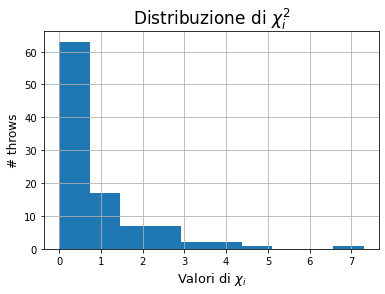

In [20]:
#Taking data from file 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#N = 1
chi = np.loadtxt("Esercise_1.1/Single_Chi_quad_distr.dat", usecols=1, unpack='true')
plt.title("Distribuzione di $\chi_i^2$", fontsize = 17)
plt.xlabel("Valori di $\chi_i$", fontsize = 13)
plt.ylabel("# throws", fontsize = 12)
plt.hist(chi)
plt.grid(True)
plt.show()

Quindi il valore di $\chi$ è dato da 

In [6]:
chi_tot = 0
for x in chi: 
    chi_tot+= x
print("chi = " + str(chi_tot))    

chi = 89.54999999999998


Ripetiamo il calcolo dei valori di $\chi$ un numero $10000$ di volte 

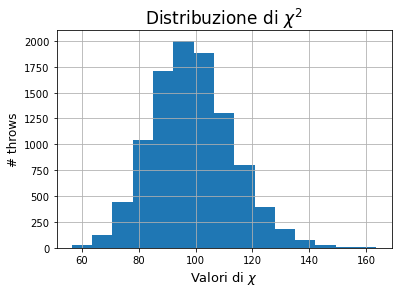

In [18]:
#Taking data from file 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#N = 1
chi = np.loadtxt("Esercise_1.1/Chi_quad_distr.dat", usecols=0, unpack='true')
chi = chi
plt.title("Distribuzione di $\chi ^2$", fontsize = 17)
plt.xlabel("Valori di $\chi$", fontsize = 13)
plt.ylabel("# throws", fontsize = 12)
plt.hist(chi, 15)
plt.grid(True)
plt.show()

La distribuzione del chi quadro ottenuta mostra dei valori di chi concentrati intorno a 100, come atteso. 
Questo valore potrebbe indicare un'ipotesi improbabile. Tuttavia osservando l'andamento della distribuzione del chi quadro, osserviamo che l'andamento dipende dal numero di gradi di libertà, per un numero maggiore di gradi di libertà il valore del chi quadro aumenta. 

In [8]:
from IPython.display import Image
# get the image
Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Chi-square_pdf.svg/1024px-Chi-square_pdf.svg.png", width=300, height=300)

# Esercizio 2: Verifica del Teorema del Limite Centrale 

#### Parte 1
Aggiungere due distribuzioni di probabilità usando il metodo dell'inversione della distribuzione cumulativa per estrarre con le seguenti distribuzioni di probabilità: 
- una generica distribuzione esponenziale, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ 
- una generica distribuzione di Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$

#### Parte 2
Produrre 3 immagini con degli istogrammi ottenuti riempiendoli con $10^4$ valori $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$),  con $x_i$ una variabile random estratta da distribuzioni: 
- uniforme da [0, 1]
- esponenziale con $\lambda=1$
- lorenziana $\mu=0$ e  $\Gamma=1$



## Metodo della funzione inversa 
L'estrazione di numeri con una distribuzione di probabilità definita può essere implementato tramite il metodo della funzione inversa. Si tratta di un metodo particolarmente efficace quando è nota analiticamente l'inversa della cumulativa. 

Data una variabile random x con una generica distribuzione $p_x(x)$ e una distribuzione cumulativa $F_x(x)$ consideriamo ora $y = F_x(x)$
$$
p_y(y) = p_x(x) \cdot\bigg( \frac{dy}{dx}\bigg)^{-1} = p_x(x)\bigg( \frac{dF_x(x)}{dx}\bigg)^{-1} = p_x(x) (p_x(x))^{-1} = \frac{p_x(x)}{p_x(x)} = 1
$$

inoltre essendo $y = F_x(x)$ segue che $0\leq y \leq 1$. Per cui y è distribuita uniformemente indipendentemente dalla distribuzione di probabilità $p_x(x)$ che caratterizza la variabile random $x$

Per cui nota l'inversa di $F_x(x)$ è possibile determinare 
$$x = F_x^{-1}(y)$$ dove $x$ è distribuita secondo la distribuzione di probabilità $p_x(x) = dF_x(x)/dx$ e $y$ è distribuita uniformemente. 

Applichiamo questo metodo alla funzione Lorentziana, per cui $x$ è estratto da 

$$x = \Gamma \tan\bigg[\pi \bigg(y - \frac{1}{2}\bigg)\bigg]$$

e alla funzione esponenziale per cui 

$$x = - \frac{1}{\lambda}\ln(1-y)$$


## Il Teorema del limite centrale TCL
Sia $X$ una variabile casuale somma di variabili casuali $X = \frac{1}{N}\sum_{i=1}^N x_i$ indipendenti ciascuna avente legge di distribuzione qualsiasi ma con valori attesi comparabili e varianze finite dello stesso ordine di grandezza.
La distribuzione di probabilità della variabile $X$ tende, all’aumentare del numero delle variabili aleatorie $x_i$ , alla distribuzione normale 
$$
p_N(X)\rightarrow \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(X - \mu)^2}{2\sigma^2}} 
$$
per $N\rightarrow \infty$


ha un valore di aspettazione $\mu$ e una varianza $\sigma^2/N$

## Risultati Distribuzione Esponenziale

In [9]:
colors = {'exp':'#721121', 'cauchy':'#086375', 'unif':'#af9164'}

In [10]:
exp1 = np.loadtxt("Exercise_1.2/Esponenziale_1.dat", usecols=0, delimiter=' ', unpack='true')
exp2 = np.loadtxt("Exercise_1.2/Esponenziale_2.dat", usecols=0, delimiter=' ', unpack='true')
exp10 = np.loadtxt("Exercise_1.2/Esponenziale_10.dat", usecols=0, delimiter=' ', unpack='true')
exp100 = np.loadtxt("Exercise_1.2/Esponenziale_100.dat", usecols=0, delimiter=' ', unpack='true')

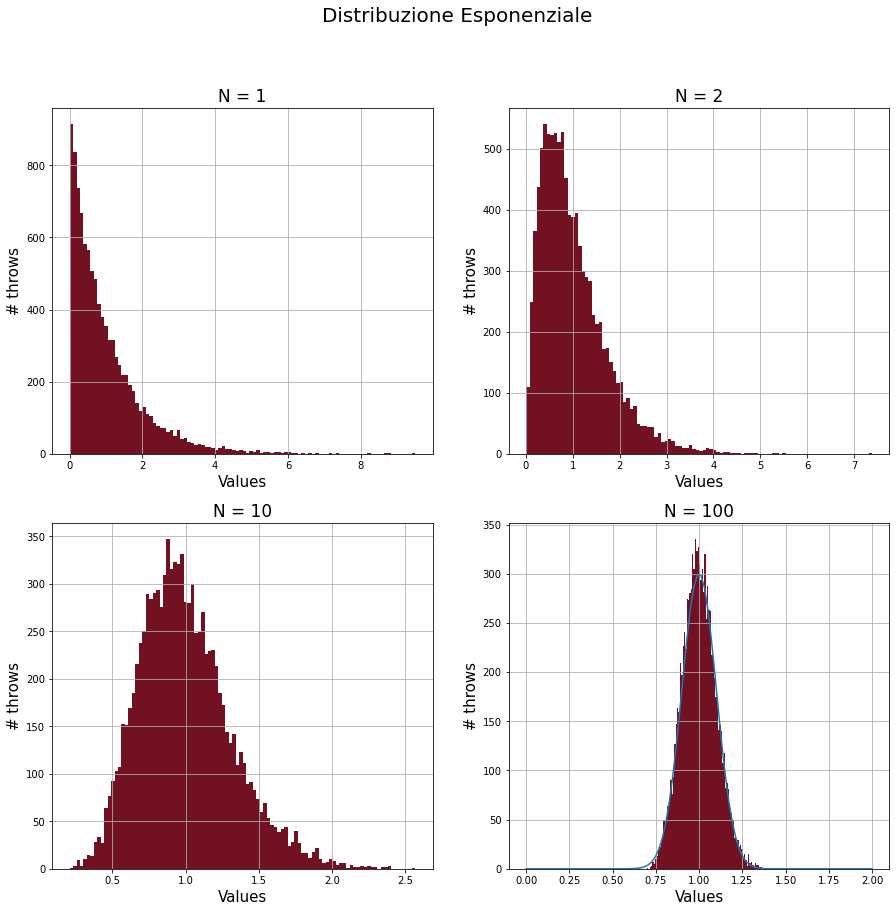

In [11]:
#Taking data from file 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x =np.linspace(0, 2, 100)
gauss = 300*np.exp(-(x-1)*(x-1)*50)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 14))
fig.suptitle("Distribuzione Esponenziale", fontsize = 20)
#N = 1
ax1.set_title("N = 1", fontsize = 17)
ax1.set_xlabel("Values", fontsize = 15)
ax1.set_ylabel("# throws", fontsize = 15)
ax1.hist(exp1, bins = 100, color = colors['exp'])
ax1.grid(True)
#N = 2
ax2.set_title("N = 2", fontsize = 17)
ax2.set_xlabel("Values", fontsize = 15)
ax2.set_ylabel("# throws", fontsize = 15)
ax2.hist(exp2, bins = 100, color = colors['exp'])
ax2.grid(True)
#N = 10
ax3.set_title("N = 10", fontsize = 17)
ax3.set_xlabel("Values", fontsize = 15)
ax3.set_ylabel("# throws", fontsize = 15)
ax3.hist(exp10, bins = 100, color = colors['exp'])
ax3.grid(True)
#N = 100
ax4.set_title("N = 100", fontsize = 17)
ax4.set_xlabel("Values", fontsize = 15)
ax4.set_ylabel("# throws", fontsize = 15)
ax4.hist(exp100, bins = 100, color = colors['exp'])
ax4.plot(x, gauss)
ax4.grid(True)


## Risultati Distribuzione di Cauchy

In [12]:
cauhy1 = np.loadtxt("Exercise_1.2/Cauchy_1.dat", usecols=0, delimiter=' ', unpack='true')
cauhy2 = np.loadtxt("Exercise_1.2/Cauchy_2.dat", usecols=0, delimiter=' ', unpack='true')
cauhy10 = np.loadtxt("Exercise_1.2/Cauchy_10.dat", usecols=0, delimiter=' ', unpack='true')
cauhy100 = np.loadtxt("Exercise_1.2/Cauchy_100.dat", usecols=0, delimiter=' ', unpack='true')

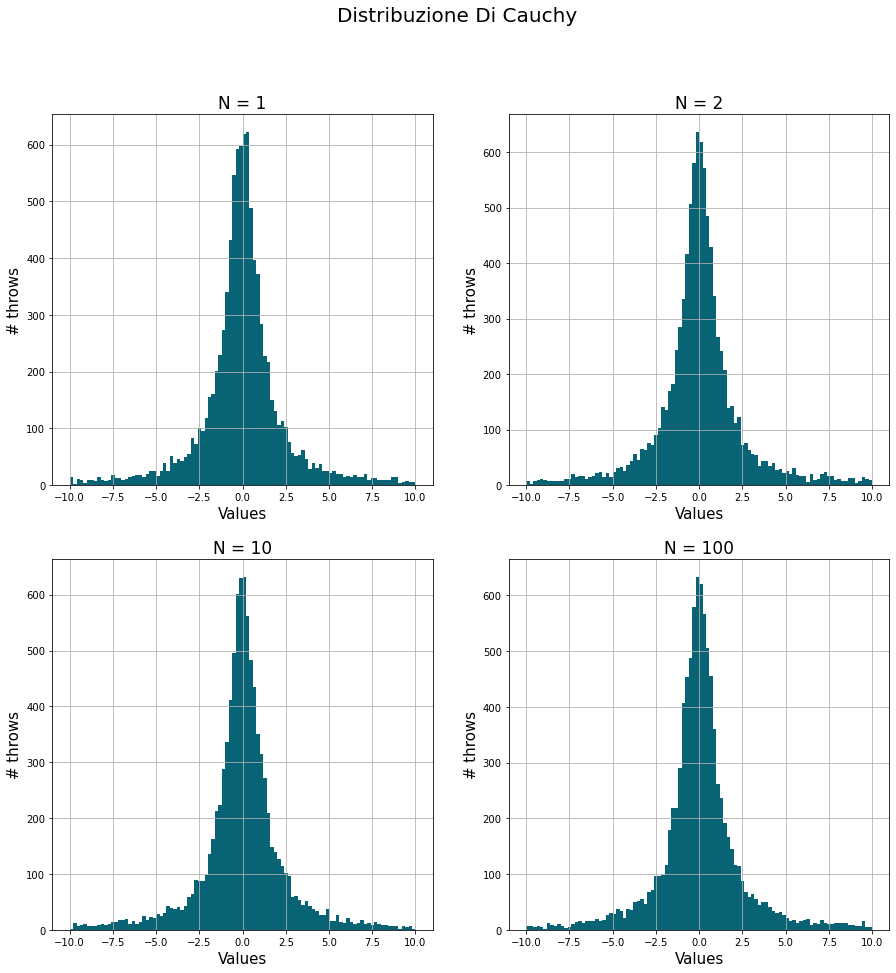

In [13]:
#Taking data from file 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 15))

fig.suptitle("Distribuzione Di Cauchy", fontsize = 20)
#N = 1
ax1.set_title("N = 1", fontsize = 17)
ax1.set_xlabel("Values", fontsize = 15)
ax1.set_ylabel("# throws", fontsize = 15)
ax1.hist(cauhy1, bins = 100, color = colors['cauchy'], range = (-10, 10))
ax1.grid(True)
#N = 2
ax2.set_title("N = 2", fontsize = 17)
ax2.set_xlabel("Values", fontsize = 15)
ax2.set_ylabel("# throws", fontsize = 15)
ax2.hist(cauhy2, bins = 100, color = colors['cauchy'], range = (-10, 10))
ax2.grid(True)
#N = 10
ax3.set_title("N = 10", fontsize = 17)
ax3.set_xlabel("Values", fontsize = 15)
ax3.set_ylabel("# throws", fontsize = 15)
ax3.hist(cauhy10, bins = 100, color = colors['cauchy'], range = (-10, 10))
ax3.grid(True)
#N = 100
ax4.set_title("N = 100", fontsize = 17)
ax4.set_xlabel("Values", fontsize = 15)
ax4.set_ylabel("# throws", fontsize = 15)
ax4.hist(cauhy100, bins = 100, color = colors['cauchy'], range = (-10, 10))

ax4.grid(True)


### Risultati distribuzione uniforme

In [14]:
unif1 = np.loadtxt("Exercise_1.2/Unif_1.dat", usecols=0, delimiter=' ', unpack='true')
unif2 = np.loadtxt("Exercise_1.2/Unif_2.dat", usecols=0, delimiter=' ', unpack='true')
unif10 = np.loadtxt("Exercise_1.2/Unif_10.dat", usecols=0, delimiter=' ', unpack='true')
unif100 = np.loadtxt("Exercise_1.2/Unif_100.dat", usecols=0, delimiter=' ', unpack='true')

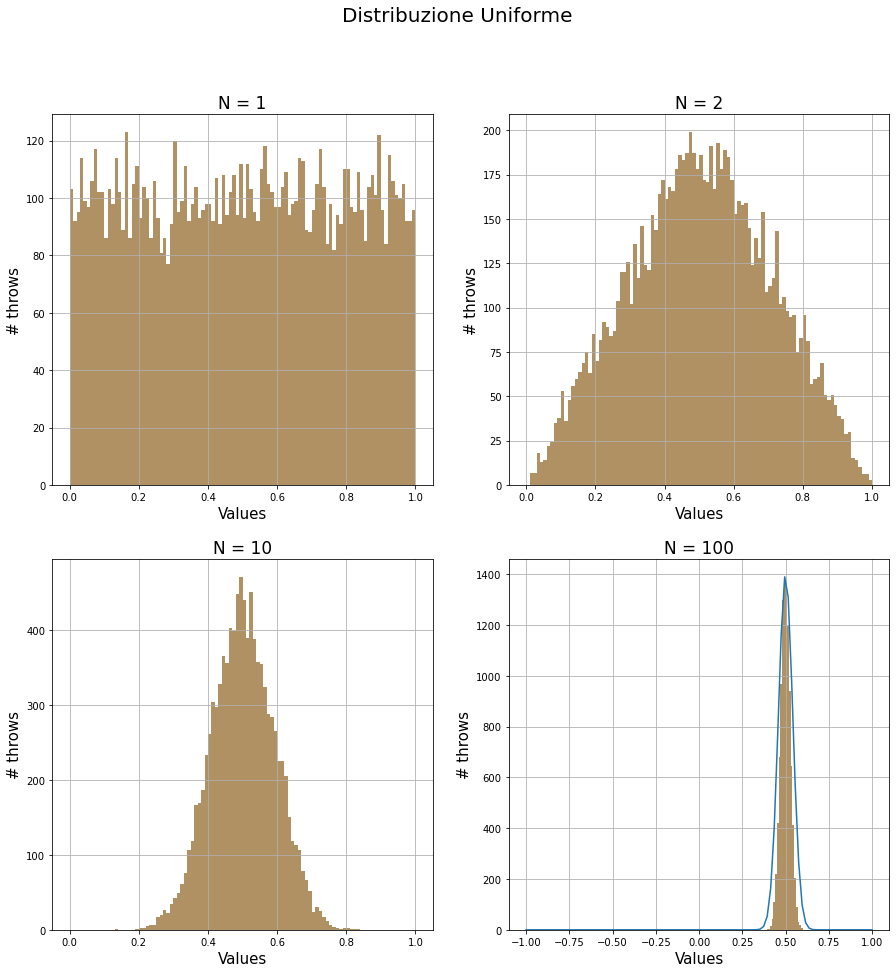

In [15]:
#Taking data from file 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 15))

x =np.linspace(-1,1, 100)
gauss = 1400*np.exp(-(x-0.5)*(x-0.5)*290)

fig.suptitle("Distribuzione Uniforme", fontsize = 20)
#N = 1
ax1.set_title("N = 1", fontsize = 17)
ax1.set_xlabel("Values", fontsize = 15)
ax1.set_ylabel("# throws", fontsize = 15)
ax1.hist(unif1, bins = 100, color = colors['unif'], range = (0,1))
ax1.grid(True)
#N = 2
ax2.set_title("N = 2", fontsize = 17)
ax2.set_xlabel("Values", fontsize = 15)
ax2.set_ylabel("# throws", fontsize = 15)
ax2.hist(unif2, bins = 100, color = colors['unif'], range = (0,1))
ax2.grid(True)
#N = 10
ax3.set_title("N = 10", fontsize = 17)
ax3.set_xlabel("Values", fontsize = 15)
ax3.set_ylabel("# throws", fontsize = 15)
ax3.hist(unif10, bins = 100, color = colors['unif'], range = (0,1))
ax3.grid(True)
#N = 100
ax4.set_title("N = 100", fontsize = 17)
ax4.set_xlabel("Values", fontsize = 15)
ax4.set_ylabel("# throws", fontsize = 15)
ax4.hist(unif100, bins = 100, color = colors['unif'], range = (0,1))
ax4.plot(x, gauss)
ax4.grid(True)

Dai risultati ottenuti osserviamo che effettivamente l'andamento della distribuzione per N = 10 inizia a comportarsi come una distribuzione gaussiana, nei casi di distribuzioni ottenuti a partire da quella uniforme e quella esponenziale è stato possibule fittare i risultati con una opportuna distribuzione gaussiana

# Exercise 01.3 - the Buffon’s experiment
Descrizione del problema: Simulare l'esperimento di Buffon. Un ago della lunghezza di $L$ è lanciato randomicamente verso un piano orizzontale misurato da righe a distanza $d$, con $d > L$, ma non $d\gg L$). La probabilità $P$ che l'ago incontri una delle linee è data da $P = 2L/\pi d$.
Questo potrebbe essere utilizzato per valutare $\pi$. 

Si ipotizzi di lanciare l'ago $N_{thr}$ volte e si ponga di osservare che l'ago tocca la linea $N_{hit}$ volte. Possiamo stimare $\pi$ da 
$$
\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}
$$

Produrre una stima di $\pi$ e della sua incertezza (Deviazione standard della media) con un largo numero di lanci $M$ come funzione del numero di blocchi $N$

## Soluzione 

### Descrizione dell'algoritmo:


Il cuore dell'algoritmo si trova nella funzione experiment, che performa un esperimento, cioè un lancio. 
L'idea dell'algoritmo è la seguente:
- si "lancia" il primo estremo del bastoncino $x_A$ estraendo un numero tra 0 e d, dove d è la distanza tra i bastoncini fissi 
- si estraggono due numeri x, y tra 0 e 1 e si cercano due valori tali che la somma in quadratura diano 1, e possano perciò rappresentare cos e sin di un dato angolo
- Si calcola l'arcotangente di y/x per estratte il valore di un angolo $\theta$
- Si calcola $x_B$, la posizione dell'estremo successivo $x_B = L \cos(\theta)$
- La funzione restituisce quindi un valore True nel caso in cui il secondo vertice sorpassi la posizione d del segno successivo: significa che il bastoncino ha "toccato" il segno

Si ripete l'esperimento un numero $N_{thr} = 10000$ di volte. Si calcola quindi il valore di $\pi$ dalla relazione 
\begin{equation} 
\pi = \frac{2LN_{thr}}{N_{hit}d}
\end{equation}


Per impostare la media a blocchi dividiamo i valori in $N_{blk} = 100$ blocchi da $L = 100$ 





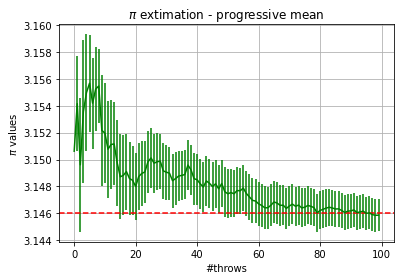

In [16]:
#Taking data from file 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("Exercise_1.3/Ex3_1_pi_values.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.title("$\pi$ extimation - progressive mean")
plt.errorbar(x,f,yerr=error, color = 'g')
plt.axhline(3.146, color = 'red', linestyle = 'dashed')
plt.xlabel('#throws')
plt.ylabel('$\pi$ values')
plt.grid(True)

plt.show()

### Commento dei risultati 

Osserviamo che il codice ideato permette di ottenere una stima adeguata del valore di $\pi$

In [17]:
pi = f[-1]
pi_err = error[-1]

print("best pi value= " + str(pi) + "+/-" + str(pi_err))

best pi value= 3.14587+/-0.00119961
